# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [15]:
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [16]:
employee.groupby('Department').mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [18]:
employee.pivot_table(index=['Department'])


,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [21]:
employee.pivot_table(index=['Department', 'Title'], values = ['Salary'], aggfunc=np.mean)


Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [28]:
# No se si me piden la media o el total del total de años de experiencia y salario. Utilizo ambos. 
employee.pivot_table(index=['Title'], values = ['Years', 'Salary'], aggfunc=[np.mean, np.sum])


mean          sum      
              Salary Years Salary Years
Title                                  
VP         70.000000  8.00    140    16
analyst    32.500000  2.25    130     9
associate  56.666667  4.00    170    12

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [38]:
employee.pivot_table(index=['Department', 'Title'], values =['Name', 'Salary'], aggfunc={'Name':'count', 
                                                                                         'Salary':'mean'}) 


Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [88]:
employee.pivot_table(index=['Department', 'Title'], values =['Salary'], aggfunc=[np.mean, np.min, np.max, np.std]) 


mean   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [59]:
#He intentado con fill_value pero no funciona. 
#employee.pivot_table(index=['Department', 'Title'], values =['Salary'], aggfunc=[np.mean, np.min, np.max, np.std], fill_value=0)
employee.pivot_table(index=['Department', 'Title'], values =['Salary'], aggfunc=[np.mean, np.min, np.max, np.std]).fillna(value=0)

mean   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [62]:
employee.pivot_table(index=['Department'], values =['Name', 'Salary'], aggfunc={'Name':'count', 
                                                                                'Salary':'sum'}) 

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [63]:
employee.pivot_table(index=['Department', 'Title'], values =['Years', 'Salary'], aggfunc={'Years':'sum', 
                                                                                'Salary':'mean'}) 

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [138]:
#Función para eliminar los valores máximos
def max_values(df):
    max_v = df.groupby('Department')['Salary'].max()
    new_data = df[~df['Salary'].isin(max_v)].mean()
    return new_data

In [144]:
max_values(employee)
#employee.pivot_table(index=['Department'], values=['Salary'], aggfunc=({'Salary':'mean'}))
employee.pivot_table(index=['Department'], values=['Salary'], aggfunc=(max_values))

,Salary
Department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [66]:
fitbit = pd.read_csv('Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [65]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
Date                      367 non-null object
Calorie burned            367 non-null int64
Steps                     367 non-null int64
Distance                  367 non-null float64
Floors                    367 non-null int64
Minutes Sedentary         367 non-null float64
Minutes Lightly Active    367 non-null int64
Minutes Fairly Active     367 non-null int64
Minutes Very Active       367 non-null int64
Activity Calories         367 non-null int64
MinutesOfSleep            367 non-null int64
MinutesOfBeingAwake       367 non-null int64
NumberOfAwakings          367 non-null int64
LengthOfRestInMinutes     367 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 40.2+ KB


In [67]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [82]:
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062605

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

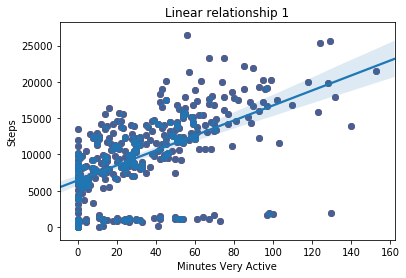

In [153]:
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'], c='red')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.title('Linear relationship 1')
ax = sns.regplot(x='Minutes Very Active', y='Steps', data=fitbit)

#### What can you say about Minute Very Active and Steps? Write a comment below

Existe una correlación lineal positiva, no excesivamente fuerte ya que es 0,50. Según la gráfica, una persona puede estar activa y no necesariamente dar pasos. 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [83]:
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990092

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0.5, 1.0, 'Linear relationship 2')

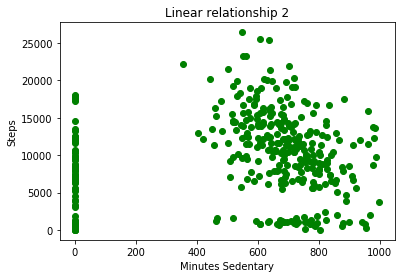

In [84]:
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'], c='green')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.title('Linear relationship 2')

No existe ninguna relación entre los pasos y los minutos de sedentarismo. La correlación es muy cercana al 0 (0.076) y como vemos en el gráfico ambas variables no se relacionan. 

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [85]:
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836388

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0.5, 1.0, 'Linear relationship 3')

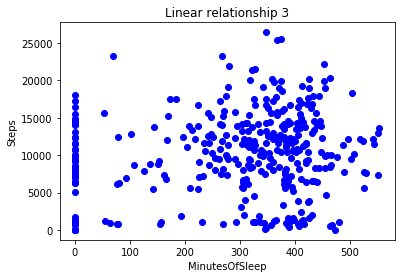

In [87]:
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'], c='blue')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.title('Linear relationship 3')

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [99]:
new_columns = fitbit[['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']]

In [101]:
cor_fit = new_columns.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [107]:
cor_fit.sort_values(['Steps'], axis=0, ascending=False)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [109]:
time_grades = pd.read_csv('Time_Grades.csv')

In [110]:
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7beaa6add8>,
      dtype=object)

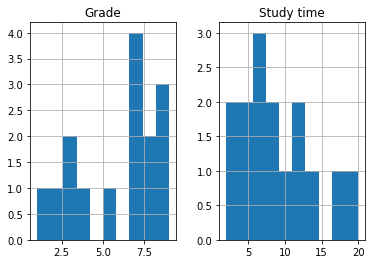

In [111]:
time_grades.hist()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [112]:
time_grades.corr()

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [114]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

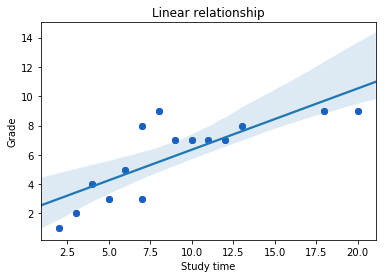

In [155]:
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'], c='blue')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.title('Linear relationship')
ax = sns.regplot(x='Study time', y='Grade', data=time_grades)

Existe una correlación lineal positiva muy leve entre el tiempo de estudio y la puntación de los estudiantes. Ya que entre 8 y 12,5 horas de estudio aproximadamente, no hay una relación postiva, se mantiene la misma puntuación aunque aumentes las horas entre 8 y 12,5. 

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

Podemos comprobar que Pearson es más sensible que Spearman. Spearman indica la relación no lineal, tiene en cuenta los outliers y puede llegar a sobrestimar el nivel de relación entre las variables. 